<h1>Decision Trees in Scikit-learn</h1>

<h3>DecisionTreeClassifier Class</h3>

<p>At first we import and prepare our dataset</p>

In [1]:
import pandas as pd

df = pd.read_csv('../data/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
print(X, "\n")

[[3 True 22.0 1 0 7.25]
 [1 False 38.0 1 0 71.2833]
 [3 False 26.0 0 0 7.925]
 ...
 [3 False 7.0 1 2 23.45]
 [1 True 26.0 0 0 30.0]
 [3 True 32.0 0 0 7.75]] 



<p>First we import the DecisionTree Classifier</p>

In [2]:
from sklearn.tree import DecisionTreeClassifier

<p>Then create a DecisionTreeClassifier object.model = DecisionTreeClassifier()</p>

In [3]:
model = DecisionTreeClassifier()

<p>Now we do a train/test split using a random_state so that every time we run the code we will get the same split.</p>

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

<p>Then we use the fit method to train the model.</p>

In [5]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

<p>Let’s now use this classifier to make a prediction for a passenger with these values:</p>

<ul>
    <li>Sex: female</li>
    <li>Pclass: 3</li>
    <li>Fare: 25</li>
    <li>Age: 30</li>
    <li>Has 1 sibling/spouse on board</li>
    <li>Has 0 parents/children on board</li>
</ul>

In [6]:
print(model.predict([[3, False, 30, 1, 0, 25]]))

[0]


<strong>We see that the model predicts that the passenger did not survive.</strong>

<h3>Scoring a Decision Tree Model</h3>

<p>We use the k-fold cross validation to get an accurate measure of the accuracy, precision, recall and f1 scores</p>
<p>In order to have something to compare it to, we build a Linear Regression Model then compare its evaluation metrics to the Decision Tree Model</p>

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

df = pd.read_csv('../data/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True, random_state=10)

dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
dt_f1_scores = []
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
lr_f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_accuracy_scores.append(dt.score(X_test, y_test))
    dt_y_pred = dt.predict(X_test)
    dt_precision_scores.append(precision_score(y_test, dt_y_pred))
    dt_recall_scores.append(recall_score(y_test, dt_y_pred))
    dt_f1_scores.append(recall_score(y_test, dt_y_pred))
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_accuracy_scores.append(lr.score(X_test, y_test))
    lr_y_pred = lr.predict(X_test)
    lr_precision_scores.append(precision_score(y_test, lr_y_pred))
    lr_recall_scores.append(recall_score(y_test, lr_y_pred))
    lr_f1_scores.append(recall_score(y_test, lr_y_pred))
    
print("Decision Tree - Gini")
print("Accuracy:", np.mean(dt_accuracy_scores))
print("Precision:", np.mean(dt_precision_scores))
print("Recall:", np.mean(dt_recall_scores))
print("F1-Score:", np.mean(dt_f1_scores), "\n")

print("Logistic Regression")
print("Accuracy:", np.mean(lr_accuracy_scores))
print("Precision:", np.mean(lr_precision_scores))
print("Recall:", np.mean(lr_recall_scores))
print("F1-Score:", np.mean(lr_f1_scores))

Decision Tree - Gini
Accuracy: 0.775630038722783
Precision: 0.7110629291007737
Recall: 0.7058600713012477
F1-Score: 0.7058600713012477 

Logistic Regression
Accuracy: 0.7970354853043865
Precision: 0.7618898922983288
Recall: 0.6900529617441382
F1-Score: 0.6900529617441382


<p>You can see that:</p>
<ul>
    <li>The accuracy and precision of the Logistic Regression model is higher</li>
    <li>The recall and F1-score of the Decision Tree model is higher</li>
</ul>
<strong>However the values are very near to each other, and therefore we still might want to use a decision tree for its interpretability</strong>

<h3>Gini vs Entropy</h3>

<p>The default impurity criterion in scikit-learn’s Decision Tree algorithm is the Gini Impurity. However, you can choose the impurity criterion by setting the <strong>criterion</strong> parameter to entropy.</p>

<p>Now we can compare a Decision Tree using gini with a Decision Tree using entropy using the same k-fold object from the previous section for a fair comparsion</p>

In [8]:
dt_entropy_accuracy_scores = []
dt_entropy_precision_scores = []
dt_entropy_recall_scores = []
dt_entropy_f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dt_entropy = DecisionTreeClassifier(criterion='entropy')
    dt_entropy.fit(X_train, y_train)
    dt_entropy_accuracy_scores.append(dt_entropy.score(X_test, y_test))
    dt_entropy_y_pred = dt_entropy.predict(X_test)
    dt_entropy_precision_scores.append(precision_score(y_test, dt_entropy_y_pred))
    dt_entropy_recall_scores.append(recall_score(y_test, dt_entropy_y_pred))
    dt_entropy_f1_scores.append(recall_score(y_test, dt_entropy_y_pred))
    
print("Decision Tree - Entropy")
print("Accuracy:", np.mean(dt_entropy_accuracy_scores))
print("Precision:", np.mean(dt_entropy_precision_scores))
print("Recall:", np.mean(dt_entropy_recall_scores))
print("F1-Score:", np.mean(dt_entropy_f1_scores), "\n")

Decision Tree - Entropy
Accuracy: 0.7733764997143402
Precision: 0.7011838193339139
Recall: 0.7164935554641437
F1-Score: 0.7164935554641437 



<strong>
    We see very little difference in the performance of Gini vs Entropy.<br/>Which is expected as they aren’t really very different functions.<br/>It’s rare to find a dataset where the choice would make a difference.
</strong>

<h3>Visualizing Decision Trees</h3>

<p>We can use scikit-learn's export_graphviz function to create a png image of the decision tree as shown below.</p>
<strong>Note! In order of this to work you need to download the Graphviz executables from the</strong>
    
[Graphviz's official website](https://graphviz.org/download/).

<p>You may also need to restart your conda environment or your computer machine</p>

<p>
    Graph objects are stored as .dot files which can be the GraphViz program. Our goal is to save a png image file. so we save the dot file created by the export_graphviz function so that we can convert it to a png using the graphviz module
</p>
<p>
    Finally, we can use the render method to create the file. We tell it the filename and file format. 
</p>
<p>
    By default, it will create extra files that we are not interested in, so we add cleanup to tell it to get rid of them.
</p>
<p>
    Now you should have a file called tree.png on your computer, and use the display method to view the generated tree on this notebook.
</p>

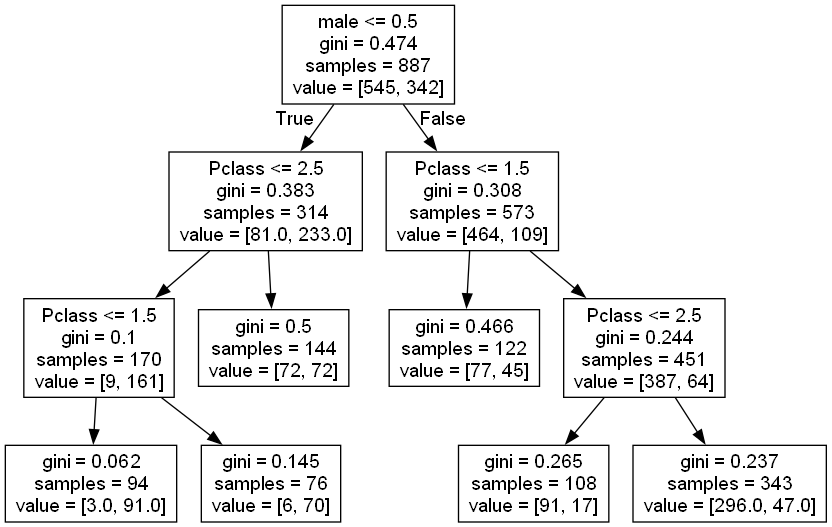

In [9]:
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='./images/tree', format='png', cleanup=True)


display(Image(filename='./images/tree.png'))

<p>Let's do a prediction using this tree for this passenger:</p>
<ul>
    <li>Sex: female</li>
    <li>Pclass: 3</li>
    <li>Fare: 25</li>
    <li>Age: 30</li>
    <li>Has 1 sibling/spouse on board</li>
    <li>Has 0 parents/children on board</li>
</ul>

In [10]:
print(model.predict([[3, False, 30, 1, 0, 25]]))

[0]


<strong>
    Looking at the generated tree graph in 'tree.png' we notice that the leaf node has 72 datapoints for passengers who survived and 72 datapoints for passengers who didn't, meaning there is a 50/50 chance here, in this case the decision tree classifier predicts that the passenger did not survive as we see above
</strong>

<p>Let's do another prediction using this tree for the same passenger but in the second class:</p>
<ul>
    <li>Sex: female</li>
    <li>Pclass: 2</li>
    <li>Fare: 25</li>
    <li>Age: 30</li>
    <li>Has 1 sibling/spouse on board</li>
    <li>Has 0 parents/children on board</li>
</ul>

In [11]:
print(model.predict([[2, False, 30, 1, 0, 25]]))

[1]


<strong>
    Looking at the generated tree graph in 'tree.png' we notice that the leaf node has 70 datapoints for passengers who survived and 6 datapoints for passengers who didn't, so the prediction would be that the passenger survive<br/><br/>
    If we need to have an estimate on the probability of surviving for this passenger, we might say there is 70/(70+6) = 0.92 chance for this passenger to survivem and 6/(70+6) = 1 - 0.92 = 0.08 chance for this passenger to not survive.
</strong>